In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [24]:
def linear_leastsq(x, y, sigma=None):
    """
    Perform a least squares fit to some line a1 + a2*x, given data points for x and y.
    Inputs:
      x: array: x (independent variable) data
      y: array: y (dependent variable) data
      sigma: array: optional uncertainties in dependent variable measurements
    Outputs:
      params: tuple of best fit parameters a1 and a2 for a line
      uncerts: tuple of uncertainties in best fit parameters
    """
    if sigma is None :
        sigma = np.ones_like(y) # This sets sigma=1 for each y
    
    S = np.sum(1/(sigma**2))
    Sx = np.sum(x/(sigma**2))
    Sy = np.sum(y/(sigma**2))
    Sxx = np.sum((x**2)/(sigma**2))
    Sxy = np.sum((x*y)/(sigma**2))

    delta = S*Sxx - Sx**2

    a1 = (Sxx*Sy - Sx*Sxy)/delta
    sig_a1 = np.sqrt(Sxx/delta)

    a2 = (S*Sxy - Sx*Sy)/delta
    sig_a2 = np.sqrt(S/delta)

    params=(a1, a2)
    uncerts=(sig_a1, sig_a2)

    return (params, uncerts)

Best fit parameters:
a1 = -3.8 +/- 0.4472135954999579
a2 = 0.8 +/- 0.31622776601683794

chi^2 = 8.400000000000002
Reduced chi^2 = 2.8000000000000007


Text(0, 0.5, 'Y Data')

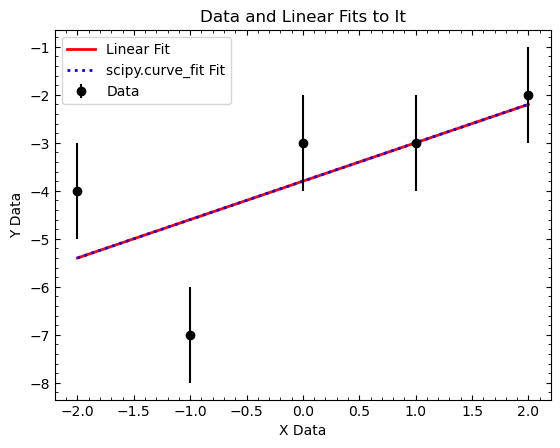

In [52]:
x=np.array([-2,-1,0,1,2])
y=np.array([-4,-7,-3,-3,-2])
sigma = np.ones_like(y) # This sets sigma=1 for each y

(a, sig) = linear_leastsq(x,y)

def f(x, a1, a2):
    return a1 + a2*x 

chisq = np.sum(((y-f(x,a[0], a[1]))/sigma)**2)
dof = len(x)-len(a)

print(f'Best fit parameters:\na1 = {a[0]} +/- {sig[0]}\na2 = {a[1]} +/- {sig[1]}')
print(f'\nchi^2 = {chisq}\nReduced chi^2 = {chisq/dof}')

xgrid=np.linspace(-2, 2, 50)

(p, C) = opt.curve_fit(f, x, y, absolute_sigma=True)

# plt.scatter(x,y, c='k', label='Data', zorder=5)
plt.errorbar(x,y,yerr=sigma, fmt='ko', label='Data', zorder=5)
plt.plot(xgrid, f(xgrid,a[0], a[1]), c='r', lw=2, label='Linear Fit')
plt.plot(xgrid, f(xgrid, p[0], p[1]), c='b', ls=':', lw=2, label='scipy.curve_fit Fit')
plt.legend()
plt.title('Data and Linear Fits to It')
plt.xlabel('X Data')
plt.ylabel('Y Data')

Best fit parameters:
a1 = -3.1142857142857143 +/- 0.50709255283711
a2 = 0.45714285714285713 +/- 0.3380617018914066

chi^2 = 0.17142857142857157
Reduced chi^2 = 0.08571428571428578


Text(0, 0.5, 'Y Data')

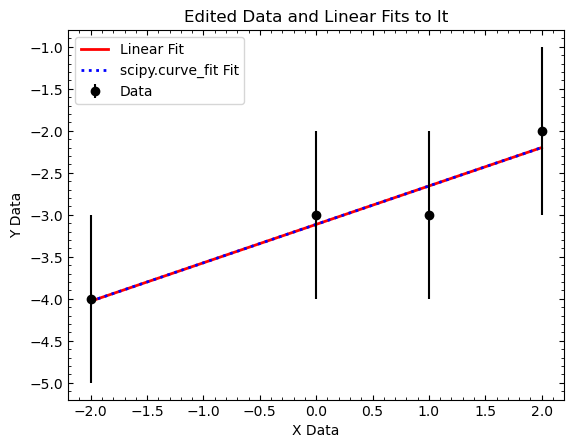

In [55]:
x=np.array([-2,0,1,2])
y=np.array([-4,-3,-3,-2])
sigma = np.ones_like(y) # This sets sigma=1 for each y

(a, sig) = linear_leastsq(x,y)

def f(x, a1, a2):
    return a1 + a2*x 

chisq = np.sum(((y-f(x,a[0], a[1]))/sigma)**2)
dof = len(x)-len(a)

print(f'Best fit parameters:\na1 = {a[0]} +/- {sig[0]}\na2 = {a[1]} +/- {sig[1]}')
print(f'\nchi^2 = {chisq}\nReduced chi^2 = {chisq/dof}')

xgrid=np.linspace(-2, 2, 50)

(p, C) = opt.curve_fit(f, x, y, absolute_sigma=True)

# plt.scatter(x,y, c='k', label='Data', zorder=5)
plt.errorbar(x,y,yerr=sigma, fmt='ko', label='Data', zorder=5)
plt.plot(xgrid, f(xgrid,a[0], a[1]), c='r', lw=2, label='Linear Fit')
plt.plot(xgrid, f(xgrid, p[0], p[1]), c='b', ls=':', lw=2, label='scipy.curve_fit Fit')
plt.legend(loc='upper left')
plt.title('Edited Data and Linear Fits to It')
plt.xlabel('X Data')
plt.ylabel('Y Data')